# Compressing data via dimensionality reduction

In [2]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Eiegen decompostion of the cov matrix

In [5]:
import numpy as np

In [6]:
cov_mat = np.cov(X_train_std.T)

In [7]:
cov_mat

array([[ 1.00813008,  0.06709556,  0.17405351, -0.35439069,  0.26374703,
         0.29079481,  0.21835807, -0.08111974,  0.10436705,  0.54282846,
         0.05893536, -0.01797029,  0.6415292 ],
       [ 0.06709556,  1.00813008,  0.08326463,  0.26356776, -0.11349172,
        -0.33735555, -0.41035281,  0.33653916, -0.21602672,  0.17504154,
        -0.551593  , -0.40561695, -0.24089991],
       [ 0.17405351,  0.08326463,  1.00813008,  0.46420355,  0.29092834,
         0.18020384,  0.15537535,  0.15918823, -0.00703776,  0.20549146,
         0.00665422,  0.02039019,  0.223495  ],
       [-0.35439069,  0.26356776,  0.46420355,  1.00813008, -0.07406447,
        -0.28060672, -0.31391899,  0.31581353, -0.24621059, -0.08872685,
        -0.22595587, -0.16799906, -0.46393412],
       [ 0.26374703, -0.11349172,  0.29092834, -0.07406447,  1.00813008,
         0.25667578,  0.21025773, -0.26003426,  0.19601657,  0.20606456,
         0.13359768,  0.06633258,  0.41810999],
       [ 0.29079481, -0.337355

In [8]:
cov_mat.shape

(13, 13)

In [9]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [10]:
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 4.84274532  2.41602459  1.54845825  0.96120438  0.84166161  0.6620634
  0.51828472  0.34650377  0.3131368   0.10754642  0.21357215  0.15362835
  0.1808613 ]


In [11]:
#Total and explained variance

In [16]:
tot = sum(eigen_vals)
var_exp = [i/tot for i in sorted(eigen_vals, reverse=True)]
var_exp

[0.36951468599607612,
 0.18434927059884171,
 0.11815159094596964,
 0.073342517637854682,
 0.064221078217316888,
 0.050517244849076721,
 0.039546538912414483,
 0.026439183169220039,
 0.023893192591852914,
 0.016296137737251033,
 0.013800211221948407,
 0.011722262443086004,
 0.0082060856790913839]

In [17]:
cum_var_exp = np.cumsum(var_exp)

In [18]:
import matplotlib.pyplot as plt

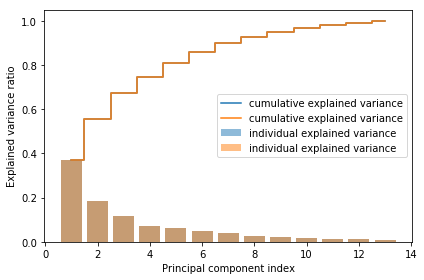

In [20]:
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [21]:
# feature transformation 

In [28]:
eigen_pairs = [(np.abs(eigen_vals[i], eigen_vecs[:,i])) for i in range(len(eigen_vals))]
eigen_pairs

[array([ 4.84274532,  4.84274532,  4.84274532,  4.84274532,  4.84274532,
         4.84274532,  4.84274532,  4.84274532,  4.84274532,  4.84274532,
         4.84274532,  4.84274532,  4.84274532]),
 array([ 2.41602459,  2.41602459,  2.41602459,  2.41602459,  2.41602459,
         2.41602459,  2.41602459,  2.41602459,  2.41602459,  2.41602459,
         2.41602459,  2.41602459,  2.41602459]),
 array([ 1.54845825,  1.54845825,  1.54845825,  1.54845825,  1.54845825,
         1.54845825,  1.54845825,  1.54845825,  1.54845825,  1.54845825,
         1.54845825,  1.54845825,  1.54845825]),
 array([ 0.96120438,  0.96120438,  0.96120438,  0.96120438,  0.96120438,
         0.96120438,  0.96120438,  0.96120438,  0.96120438,  0.96120438,
         0.96120438,  0.96120438,  0.96120438]),
 array([ 0.84166161,  0.84166161,  0.84166161,  0.84166161,  0.84166161,
         0.84166161,  0.84166161,  0.84166161,  0.84166161,  0.84166161,
         0.84166161,  0.84166161,  0.84166161]),
 array([ 0.6620634,  0.66

In [29]:
eigen_pairs.sort(key=lambda k:k[0], reverse =True)

In [33]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

IndexError: invalid index to scalar variable.